<h1 align="center">Customer Segmentation</h1> 
<h4 align='center'>using K-means clustering</h4>

### Importing libraries

In [171]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
import seaborn as sns 
plt.style.use('seaborn')

### Importing the dfset

In [172]:
df = pd.read_csv('data/bike_buyers.csv')

### Exploring the dataset

In [173]:
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


### Checking the dimensions and the shape of the data

In [174]:
df.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,994.000000,992.000000,991.000000,992.000000
mean,19965.992000,56267.605634,1.910282,1.455096,44.181452
std,5347.333948,31067.817462,1.626910,1.121755,11.362007
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


So, our dataset has 13 columns named:
* ID
* Martial Status
* Gender
* Income
* Children
* Education
* Occupation
* Home Owner
* Cars
* Commute Distance
* Region
* Age
* Purchased Bike

## Cleaning the dataset

### Renaming Columns

In [176]:
df = df.rename(columns={'Marital Status':'Marital_Status','Home Owner':'Home_Owner', 'Commute Distance':'Commute_Distance', 'Purchased Bike'
                           : 'Purchased_Bike'})

### Removing null values

Checking the counts of null values

In [177]:
df.isnull().sum()

ID                   0
Marital_Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home_Owner           4
Cars                 9
Commute_Distance     0
Region               0
Age                  8
Purchased_Bike       0
dtype: int64

Removing all the rows with null values

In [178]:
df = df.dropna(how='any')
df.shape

(952, 13)

### Removing irrelevant features

The feature ID is removed since it is only used to count the data points and it is not relevant

In [179]:
df = df.drop('ID', axis=1)
df.head()

,Marital_Status,Gender,Income,Children,Education,Occupation,Home_Owner,Cars,Commute_Distance,Region,Age,Purchased_Bike
0,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
4,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
5,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,No


Converting float to int

In [180]:
df[['Age', 'Income', 'Children', 'Cars']] = df[['Age', 'Income', 'Children', 'Cars']].astype(int)
df.head()

,Marital_Status,Gender,Income,Children,Education,Occupation,Home_Owner,Cars,Commute_Distance,Region,Age,Purchased_Bike
0,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
4,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
5,Married,Female,10000,2,Partial College,Manual,Yes,0,1-2 Miles,Europe,50,No


## Preliminary Analysis of the data

### Gender Data

In [181]:
df['Gender'].describe()

count      952
unique       2
top       Male
freq       479
Name: Gender, dtype: object

Counts of each type in the Gender Column using value_counts()

In [184]:
df['Gender'].value_counts()

Male      479
Female    473
Name: Gender, dtype: int64

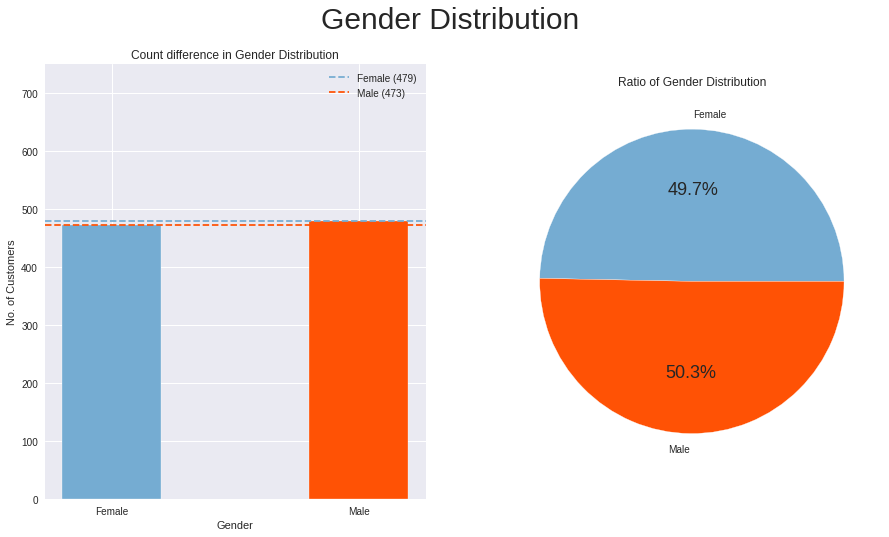

In [187]:
labels=df['Gender'].unique()
values=df['Gender'].value_counts(ascending=True)


fig, (ax0,ax1) = plt.subplots(ncols=2,figsize=(15,8))
bar = ax0.bar(x=labels, height=values, width=0.4, align='center', color=['#75ACD2','#FF5205'])
ax0.set(title='Count difference in Gender Distribution',xlabel='Gender', ylabel='No. of Customers')
ax0.set_ylim(0,750)
ax0.axhline(y=df['Gender'].value_counts()[0], color='#75ACD2', linestyle='--', label=f'Female ({df.Gender.value_counts()[0]})')
ax0.axhline(y=df['Gender'].value_counts()[1], color='#FF5205', linestyle='--', label=f'Male ({df.Gender.value_counts()[1]})')
ax0.legend()


ax1.pie(values,labels=labels,colors=['#75ACD2','#FF5205'],autopct='%1.1f%%')
ax1.set(title='Ratio of Gender Distribution')
fig.suptitle('Gender Distribution', fontsize=30);
plt.show()


### Age Data

In [188]:
df['Age'].unique()

array([42, 43, 60, 36, 50, 54, 35, 45, 38, 59, 47, 55, 56, 34, 63, 29, 44,
       32, 26, 31, 62, 41, 30, 28, 40, 65, 48, 66, 46, 52, 61, 37, 68, 33,
       51, 49, 53, 39, 27, 25, 58, 67, 57, 70, 78, 69, 64, 89, 80, 73, 71,
       72])

In [189]:
df['Age'].describe()

count    952.000000
mean      44.256303
std       11.428167
min       25.000000
25%       35.000000
50%       43.000000
75%       52.000000
max       89.000000
Name: Age, dtype: float64

Visualizing Statistical Description of the Age on a boxplot.

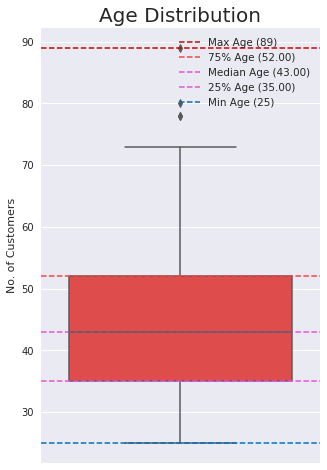

In [190]:
fig, ax = plt.subplots(figsize=(5,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(y=df["Age"], color="#f73434")
ax.axhline(y=df['Age'].max(), linestyle='--',color='#c90404', label=f'Max Age ({df.Age.max()})')
ax.axhline(y=df['Age'].describe()[6], linestyle='--',color='#f74343', label=f'75% Age ({df.Age.describe()[6]:.2f})')
ax.axhline(y=df['Age'].median(), linestyle='--',color='#eb50db', label=f'Median Age ({df.Age.median():.2f})')
ax.axhline(y=df['Age'].describe()[4], linestyle='--',color='#eb50db', label=f'25% Age ({df.Age.describe()[4]:.2f})')
ax.axhline(y=df['Age'].min(), linestyle='--',color='#046ebf', label=f'Min Age ({df.Age.min()})')
ax.legend(fontsize='xx-small', loc='upper right')
ax.set_ylabel('No. of Customers')

plt.title('Age Distribution', fontsize = 20)
plt.show()

Counts of first five max age in the Age Column.

In [191]:
df['Age'].value_counts().head()

40    37
47    36
36    35
43    34
35    34
Name: Age, dtype: int64

Visualizing Age Distribution using a countplot.

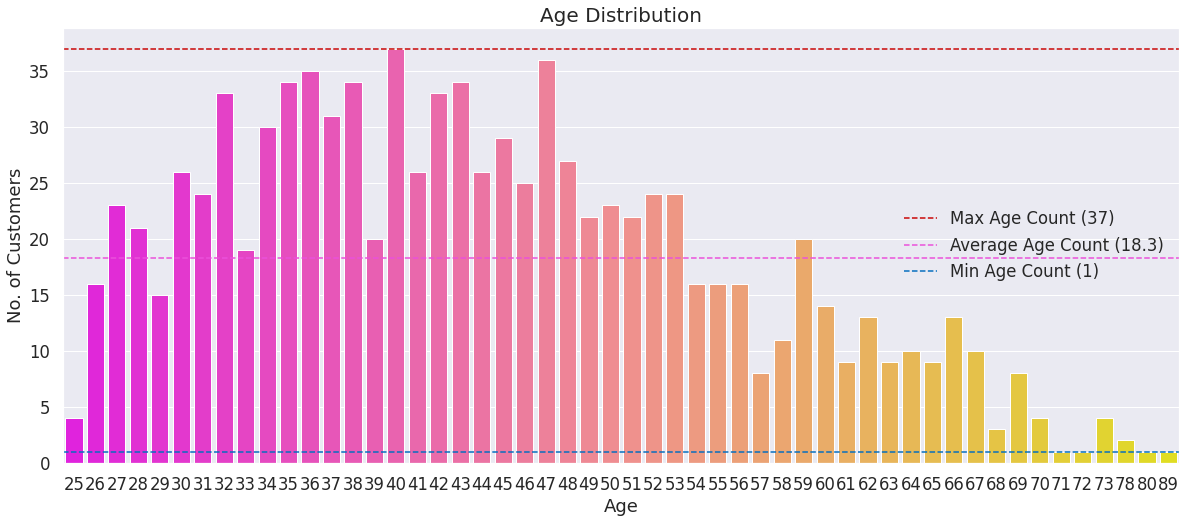

In [192]:
fig, ax = plt.subplots(figsize=(20,8))
sns.set(font_scale=1.5)
ax = sns.countplot(x=df['Age'], palette='spring')
ax.axhline(y=df['Age'].value_counts().max(), linestyle='--',color='#c90404', label=f'Max Age Count ({df.Age.value_counts().max()})')
ax.axhline(y=df['Age'].value_counts().mean(), linestyle='--',color='#eb50db', label=f'Average Age Count ({df.Age.value_counts().mean():.1f})')
ax.axhline(y=df['Age'].value_counts().min(), linestyle='--',color='#046ebf', label=f'Min Age Count ({df.Age.value_counts().min()})')
ax.legend(loc ='right')
ax.set_ylabel('No. of Customers')

plt.title('Age Distribution', fontsize = 20)
plt.show()

###### Gender wise Age Distribution

Statistical Age Distribution of Male customers.

In [193]:
df[df['Gender']=='Male']['Age'].describe()

count    479.000000
mean      44.210856
std       11.385018
min       25.000000
25%       35.000000
50%       43.000000
75%       52.000000
max       78.000000
Name: Age, dtype: float64

Statistical Age Distribution of female customers.

In [194]:
df[df['Gender']=='Female']['Age'].describe()

count    473.000000
mean      44.302326
std       11.483570
min       25.000000
25%       35.000000
50%       42.000000
75%       52.000000
max       89.000000
Name: Age, dtype: float64

Visualizing Gender wise Age Distribution of Male and Female customers on a boxplot.

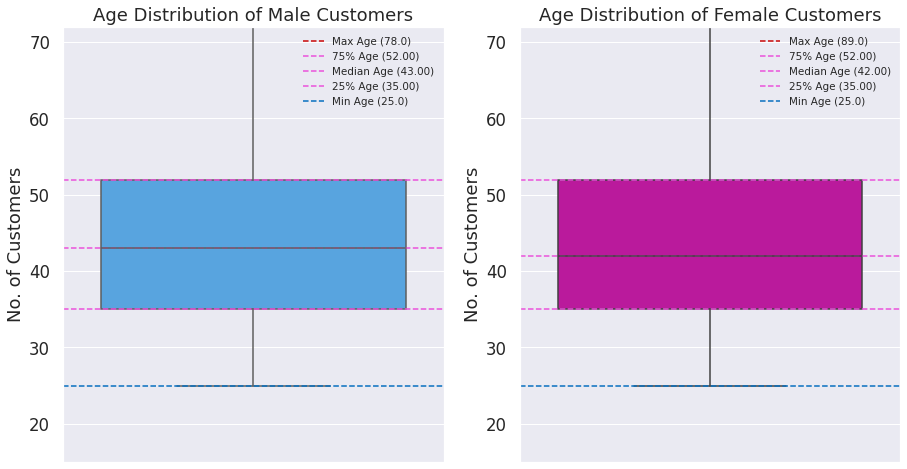

In [195]:
df_male = df[df['Gender']=='Male']['Age'].describe()
df_female = df[df['Gender']=='Female']['Age'].describe()

fig, (ax0,ax1) = plt.subplots(ncols=2,figsize=(15,8))
sns.set(font_scale=1.5)
sns.boxplot(y=df[df['Gender']=='Male']['Age'], color="#42a7f5", ax=ax0)
ax0.axhline(y=df['Age'].max(), linestyle='--',color='#c90404', label=f'Max Age ({df_male[7]})')
ax0.axhline(y=df_male[6], linestyle='--',color='#eb50db', label=f'75% Age ({df_male[6]:.2f})')
ax0.axhline(y=df_male[5], linestyle='--',color='#eb50db', label=f'Median Age ({df_male[5]:.2f})')
ax0.axhline(y=df_male[4], linestyle='--',color='#eb50db', label=f'25% Age ({df_male[4]:.2f})')
ax0.axhline(y=df_male[3], linestyle='--',color='#046ebf', label=f'Min Age ({df_male[3]})')
ax0.legend(fontsize='xx-small', loc='upper right')
ax0.set(ylabel='No. of Customers', title='Age Distribution of Male Customers')
ax0.set_ylim(15,72)

ax1 = sns.boxplot(y=df[df['Gender']=='Female']['Age'], color="#d400ad", ax=ax1)
ax1.axhline(y=df_female[7], linestyle='--',color='#c90404', label=f'Max Age ({df_female[7]})')
ax1.axhline(y=df_female[6], linestyle='--',color='#eb50db', label=f'75% Age ({df_female[6]:.2f})')
ax1.axhline(y=df_female[5], linestyle='--',color='#eb50db', label=f'Median Age ({df_female[5]:.2f})')
ax1.axhline(y=df_female[4], linestyle='--',color='#eb50db', label=f'25% Age ({df_female[4]:.2f})')
ax1.axhline(y=df_female[3], linestyle='--',color='#046ebf', label=f'Min Age ({df_female[3]})')
ax1.legend(fontsize='xx-small', loc='upper right')
ax1.set(ylabel='No. of Customers', title='Age Distribution of Female Customers')
ax1.set_ylim(15,72)

plt.show()

Average Age of Male Customers.

In [196]:
df[df['Gender']=='Male'].Age.mean()

44.21085594989562

Counts of first five max age counts in the Male Customers.

In [197]:
df[df['Gender']=='Male'].Age.value_counts().head()

47    22
43    20
35    19
38    18
36    17
Name: Age, dtype: int64

Visualizing distribution of age count in Male customers using a countplot.

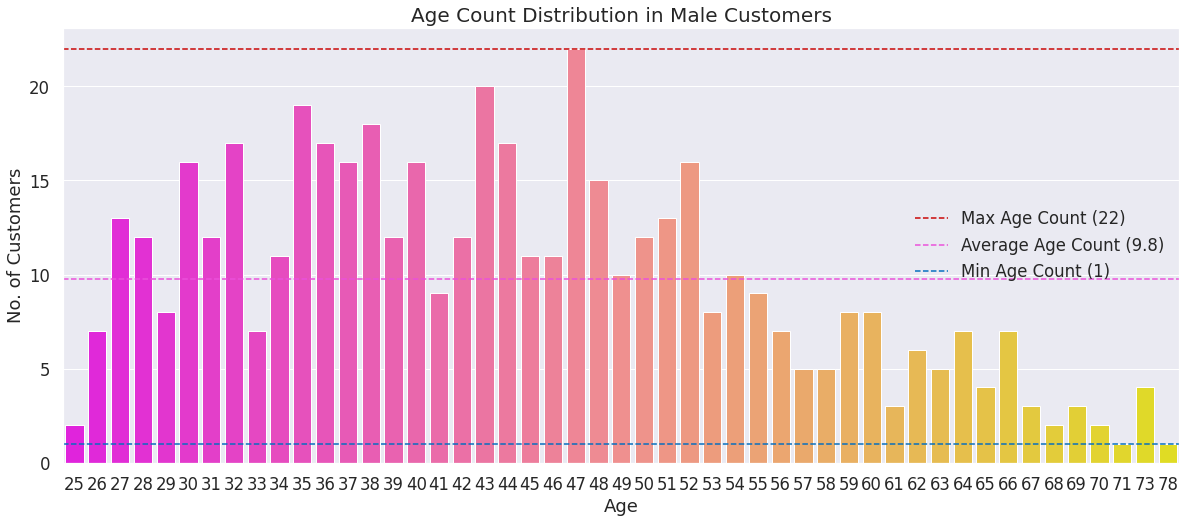

In [198]:
maxi = df[df['Gender']=='Male'].Age.value_counts().max()
mean = df[df['Gender']=='Male'].Age.value_counts().mean()
mini = df[df['Gender']=='Male'].Age.value_counts().min()


fig, ax = plt.subplots(figsize=(20,8))
sns.set(font_scale=1.5)
ax = sns.countplot(x=df[df['Gender']=='Male'].Age, palette='spring')

ax.axhline(y=maxi, linestyle='--',color='#c90404', label=f'Max Age Count ({maxi})')
ax.axhline(y=mean, linestyle='--',color='#eb50db', label=f'Average Age Count ({mean:.1f})')
ax.axhline(y=mini, linestyle='--',color='#046ebf', label=f'Min Age Count ({mini})')
ax.set_ylabel('No. of Customers')

ax.legend(loc ='right')

plt.title('Age Count Distribution in Male Customers', fontsize = 20)
plt.show()

Average Age of Female Customers.

In [199]:
df[df['Gender']=='Female'].Age.mean()

44.30232558139535

Counts of first five max age count in the Female Customers.

In [200]:
df[df['Gender']=='Female'].Age.value_counts().head()

42    21
40    21
34    19
45    18
36    18
Name: Age, dtype: int64

Visualizing distribution of age count in Female customers using a countplot.

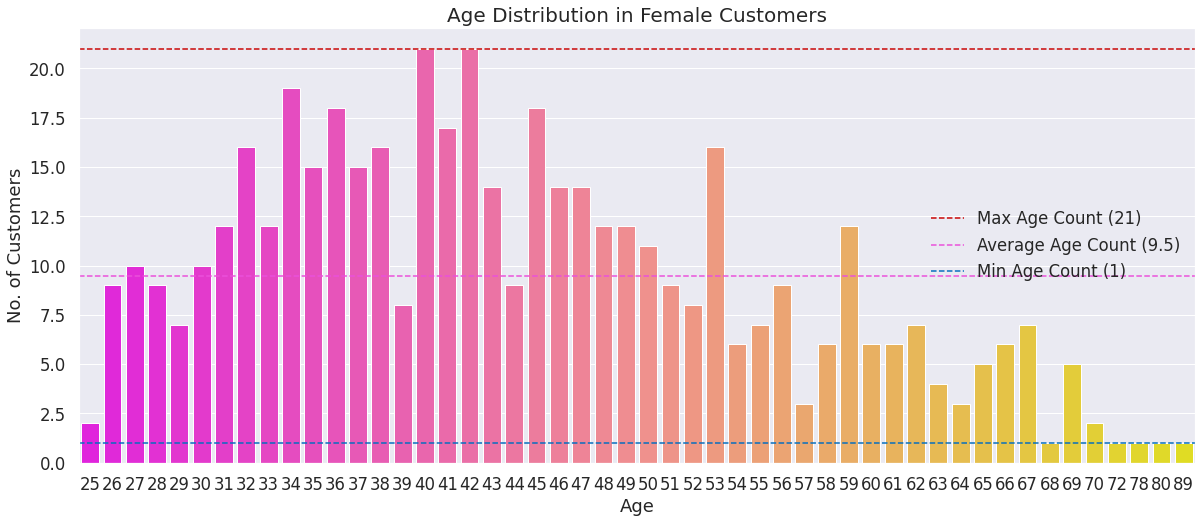

In [201]:
maxi = df[df['Gender']=='Female'].Age.value_counts().max()
mean = df[df['Gender']=='Female'].Age.value_counts().mean()
mini = df[df['Gender']=='Female'].Age.value_counts().min()


fig, ax = plt.subplots(figsize=(20,8))
sns.set(font_scale=1.5)
ax = sns.countplot(x=df[df['Gender']=='Female'].Age, palette='spring')
ax.axhline(y=maxi, linestyle='--',color='#c90404', label=f'Max Age Count ({maxi})')
ax.axhline(y=mean, linestyle='--',color='#eb50db', label=f'Average Age Count ({mean:.1f})')
ax.axhline(y=mini, linestyle='--',color='#046ebf', label=f'Min Age Count ({mini})')
ax.set_ylabel('No. of Customers')
ax.legend(loc ='right')

plt.title('Age Distribution in Female Customers', fontsize = 20)
plt.show()

### Analyzing data

####  Analyzing Annual Income data

In [202]:
df['Income'].head()

0    40000
1    30000
2    80000
4    30000
5    10000
Name: Income, dtype: int64

In [203]:
df['Income'].describe()

count       952.000000
mean      55903.361345
std       30845.483596
min       10000.000000
25%       30000.000000
50%       60000.000000
75%       70000.000000
max      170000.000000
Name: Income, dtype: float64

Distribution of Income

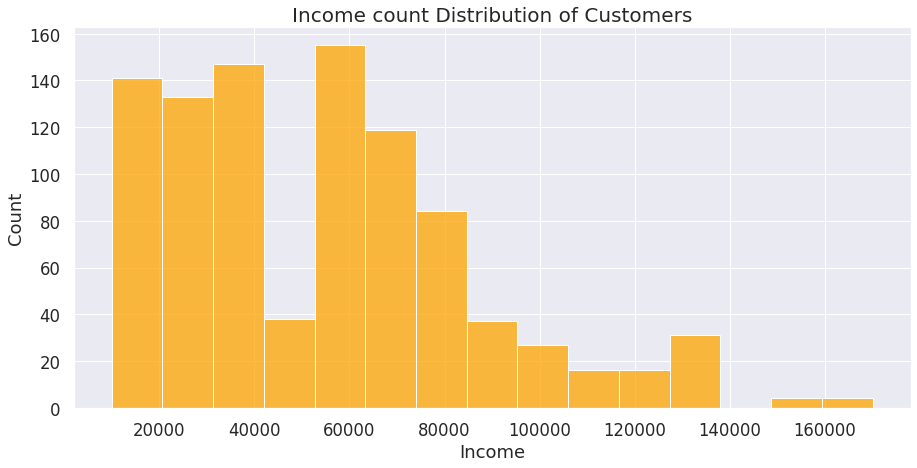

In [204]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.histplot(df['Income'], bins=15, ax=ax, color=['orange'])
ax.set_xlabel('Income')
plt.title('Income count Distribution of Customers', fontsize = 20)
plt.show()

Visualizing Income per Age on a Scatterplot.

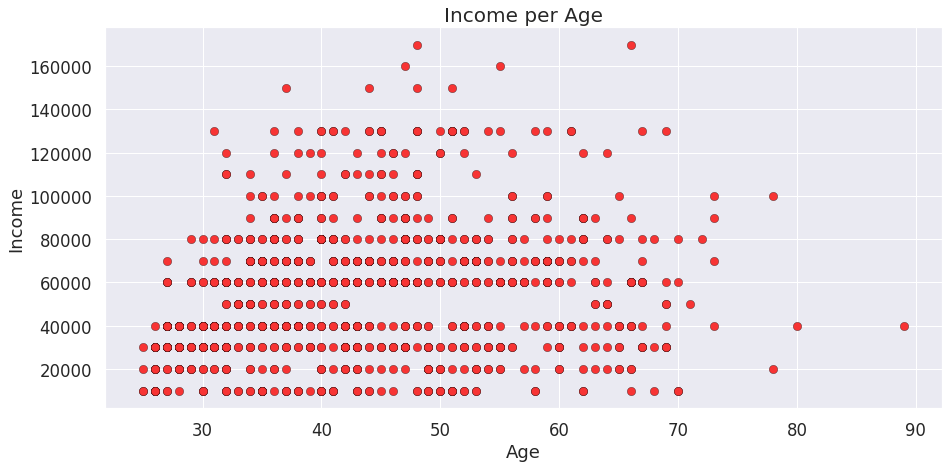

In [205]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=df['Income'], x=df['Age'], color='#f73434', s=70,edgecolor='black', linewidth=0.3)
ax.set_ylabel('Income')

plt.title('Income per Age', fontsize = 20)
plt.show()

###### Annual Income per Gender.

Statistical data about the Income of male customer.

In [206]:
df[df['Gender']=='Male'].Income.describe()

count       479.000000
mean      57223.382046
std       30994.907738
min       10000.000000
25%       30000.000000
50%       60000.000000
75%       70000.000000
max      170000.000000
Name: Income, dtype: float64

Statistical data about the Income of female customer.

In [207]:
df[df['Gender']=='Female'].Income.describe()

count       473.000000
mean      54566.596195
std       30668.268542
min       10000.000000
25%       30000.000000
50%       60000.000000
75%       70000.000000
max      170000.000000
Name: Income, dtype: float64

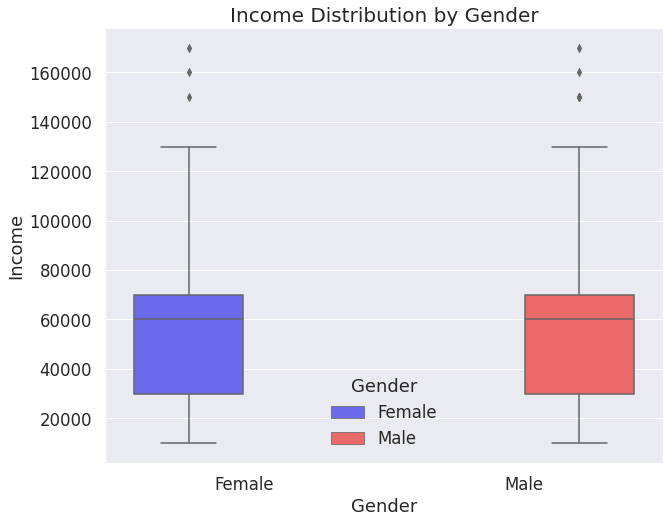

In [208]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(x=df['Gender'], y=df["Income"], hue=df['Gender'], palette='seismic')
ax.set_ylabel('Income')

plt.title('Income Distribution by Gender', fontsize = 20)
plt.show()

Visualizing Income per Age by Gender on a scatterplot.

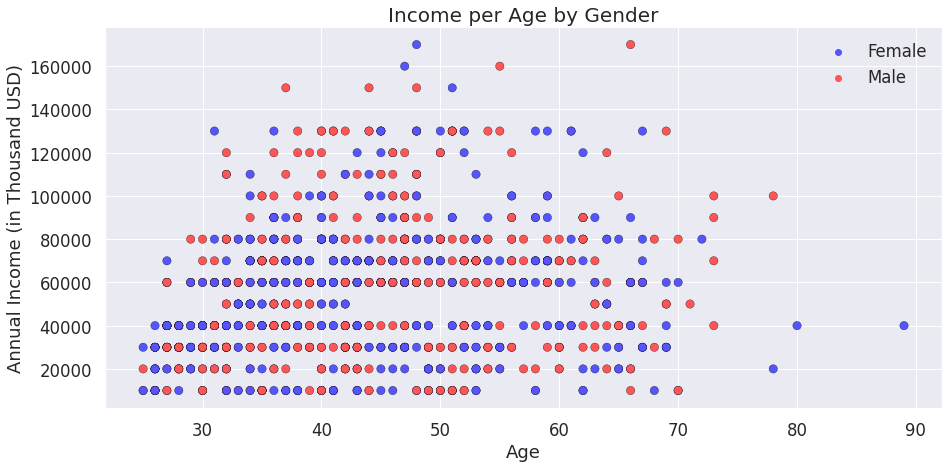

In [209]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=df['Income'], x=df['Age'], hue=df['Gender'], palette='seismic', s=70,edgecolor='black', linewidth=0.3)
ax.set_ylabel('Annual Income (in Thousand USD)')
ax.legend(loc ='upper right')

plt.title('Income per Age by Gender', fontsize = 20)
plt.show()

Visualizing difference of Income between Male and Female Customers using Violin Plot.

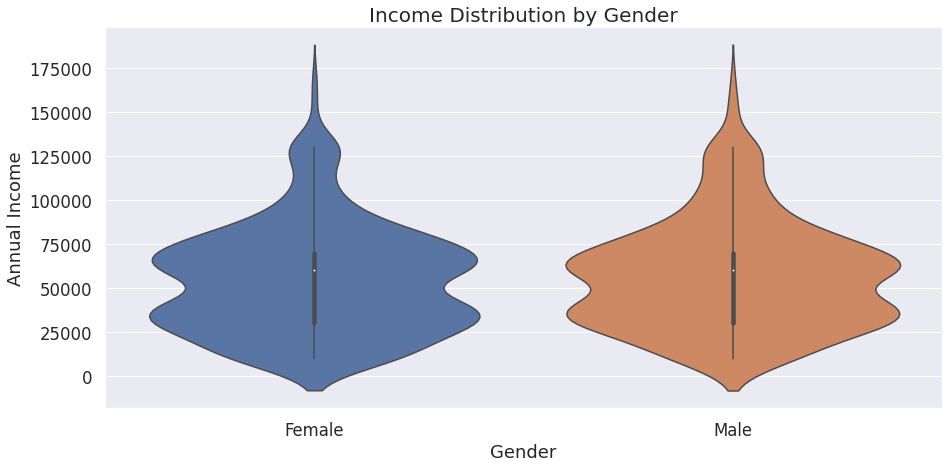

In [210]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.violinplot(y=df['Income'],x=df['Gender'])
ax.set_ylabel('Annual Income')

plt.title('Income Distribution by Gender', fontsize = 20)
plt.show()

#### Region Data

In [211]:
df['Region'].describe()

count               952
unique                3
top       North America
freq                486
Name: Region, dtype: object

Distribution of the data across to regions

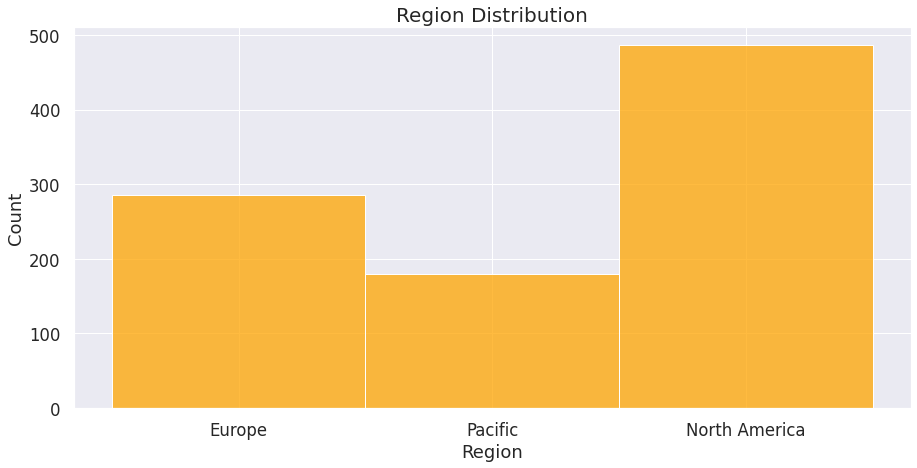

In [212]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.histplot(df['Region'], bins=15, ax=ax, color=['orange'])
ax.set_xlabel('Region')
plt.title('Region Distribution', fontsize = 20)
plt.show()

Statistical Data about the income of people in Europe Region

In [213]:
df[df['Region']=='Europe'].Income.describe()

count       286.000000
mean      40384.615385
std       34236.417069
min       10000.000000
25%       20000.000000
50%       30000.000000
75%       40000.000000
max      170000.000000
Name: Income, dtype: float64

Statistical Data about the income of people in Pacific Region

In [214]:
df[df['Region']=='Pacific'].Income.describe()

count       180.000000
mean      62444.444444
std       33033.286450
min       10000.000000
25%       30000.000000
50%       70000.000000
75%       80000.000000
max      160000.000000
Name: Income, dtype: float64

Statistical Data about the income of people in North American Region

In [215]:
df[df['Region']=='North America'].Income.describe()

count       486.000000
mean      62613.168724
std       23897.602680
min       10000.000000
25%       40000.000000
50%       60000.000000
75%       70000.000000
max      170000.000000
Name: Income, dtype: float64

Visualizing the difference in Income across regions in a Box and violin Plot

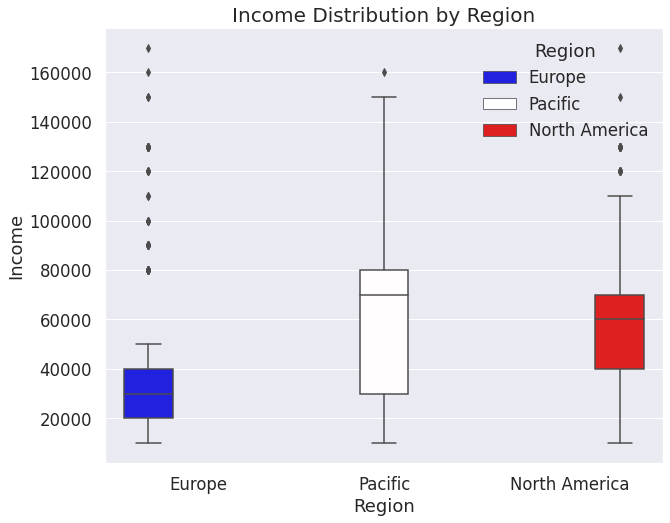

In [216]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(x=df['Region'], y=df["Income"], hue=df['Region'], palette='seismic')
ax.set_ylabel('Income')

plt.title('Income Distribution by Region', fontsize = 20)
plt.show()

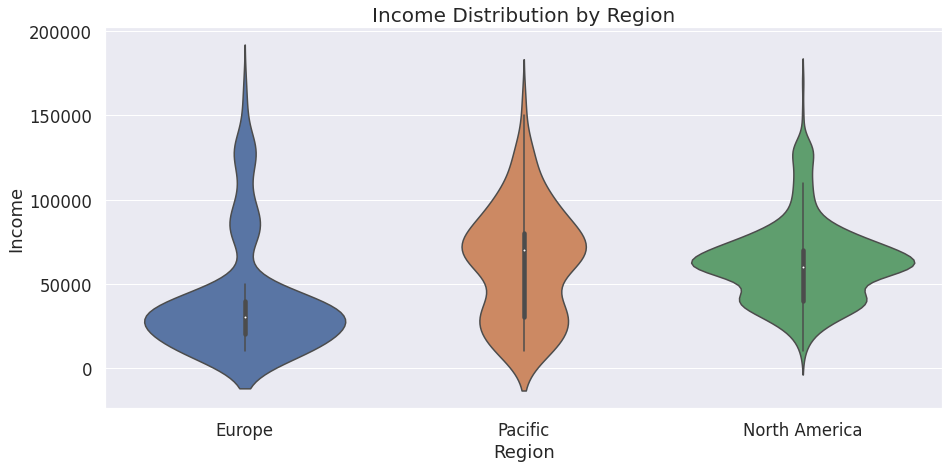

In [217]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.violinplot(y=df['Income'],x=df['Region'])
ax.set_ylabel('Income')

plt.title('Income Distribution by Region', fontsize = 20)
plt.show()


### Converting Categorical features to numeric 


In [218]:
from sklearn.preprocessing import LabelEncoder


feature_map = {}
for field in df.select_dtypes(exclude=[int, float]):
    le = LabelEncoder()
    df[field] = le.fit_transform(df[field])
    feature_map[field] = {le.transform([cl])[0]:cl for cl in le.classes_}

df.head()

,Marital_Status,Gender,Income,Children,Education,Occupation,Home_Owner,Cars,Commute_Distance,Region,Age,Purchased_Bike
0,0,0,40000,1,0,4,1,0,0,0,42,0
1,0,1,30000,3,3,0,1,1,0,0,43,0
2,0,1,80000,5,3,3,0,2,3,0,60,0
4,1,1,30000,0,0,0,0,0,0,0,36,1
5,0,0,10000,2,3,2,1,0,1,0,50,0


### Correlation

In [219]:
corr = df.corr()
corr.head()

,Marital_Status,Gender,Income,Children,Education,Occupation,Home_Owner,Cars,Commute_Distance,Region,Age,Purchased_Bike
Marital_Status,1.000000,-0.098570,-0.087023,-0.136447,0.065515,-0.067883,-0.327938,0.008568,0.033143,-0.023439,-0.209064,0.106043
Gender,-0.098570,1.000000,0.043088,-0.018413,-0.008378,0.032862,-0.004769,0.058869,0.070966,0.067931,-0.004004,-0.018660
Income,-0.087023,0.043088,1.000000,0.260923,-0.236995,0.141959,0.016209,0.433365,0.167540,0.277015,0.175876,0.048975
Children,-0.136447,-0.018413,0.260923,1.000000,-0.052634,0.017296,0.156967,0.272482,0.080321,0.058404,0.536302,-0.117545
Education,0.065515,-0.008378,-0.236995,-0.052634,1.000000,0.031309,-0.123053,0.163453,0.118606,-0.139513,-0.095668,-0.136610


### Correlation Heatmap

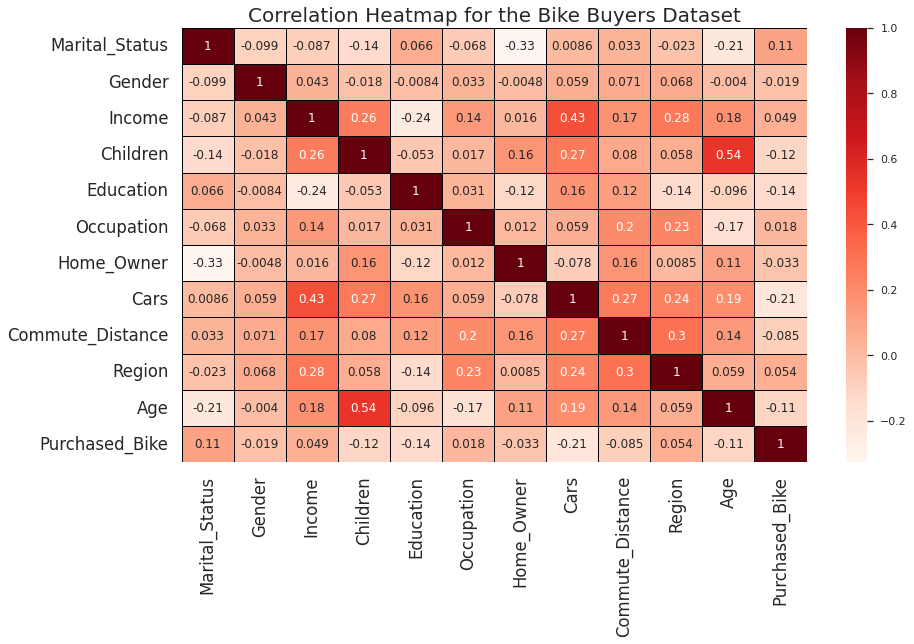

In [220]:
fig, ax = plt.subplots(figsize=(14,8))
sns.set()
ax = sns.heatmap(corr, cmap = 'Reds', annot = True, linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap for the Bike Buyers Dataset', fontsize = 20)
plt.show()